In [1]:
import pandas as pd
import numpy as np
import time
data = pd.read_csv("diabetes.csv")
data.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
data.shape


(768, 9)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


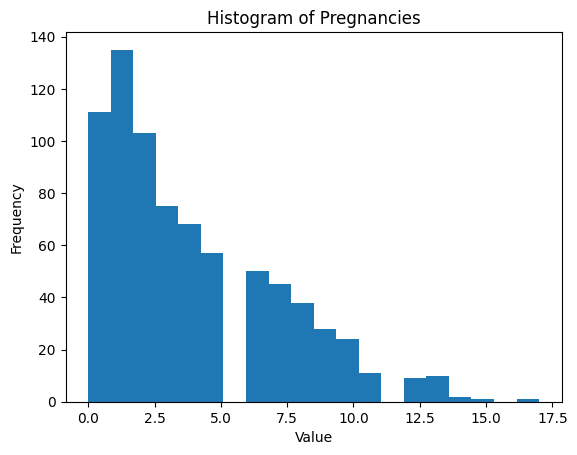

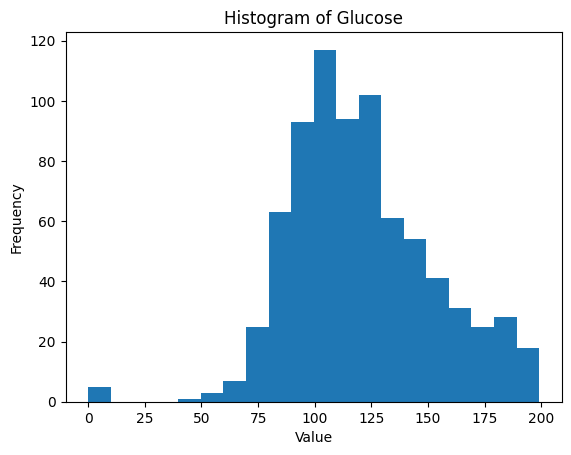

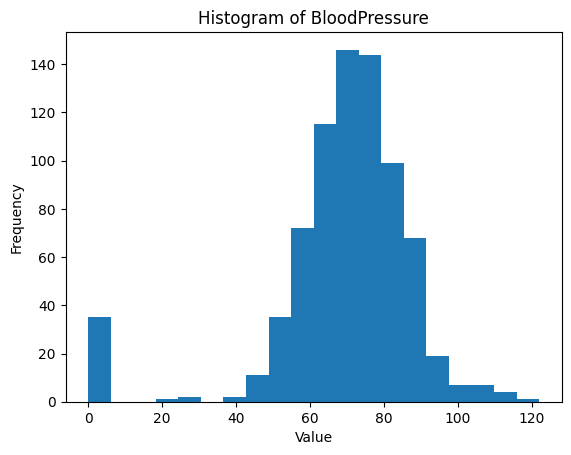

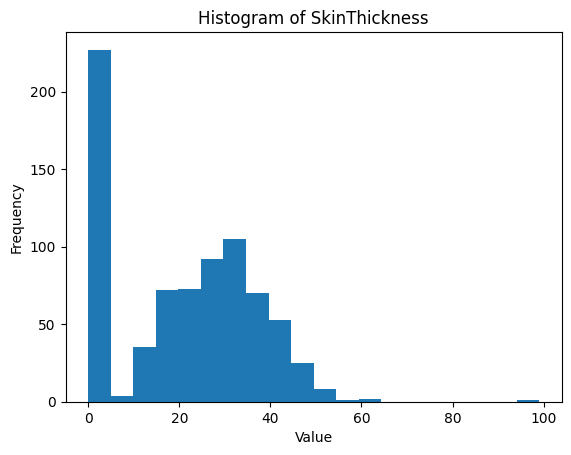

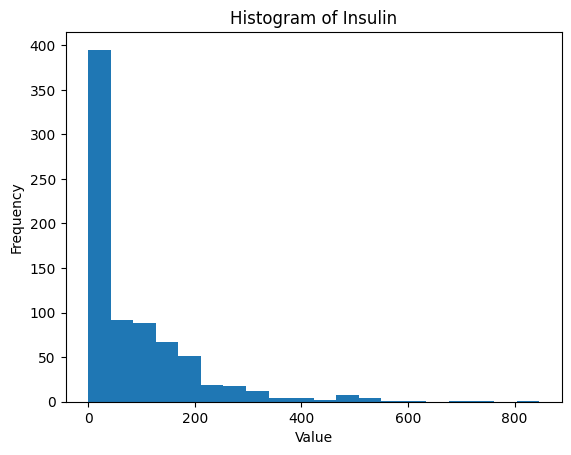

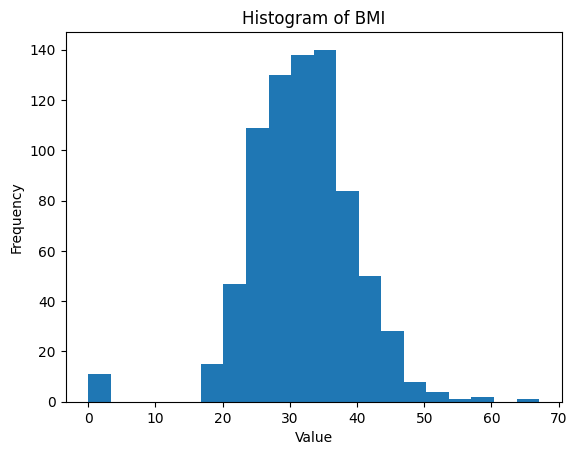

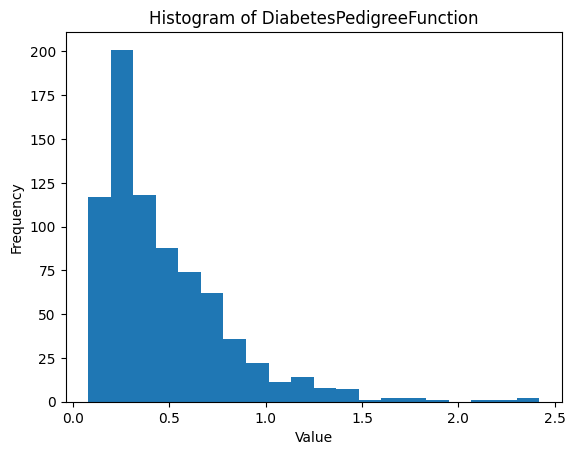

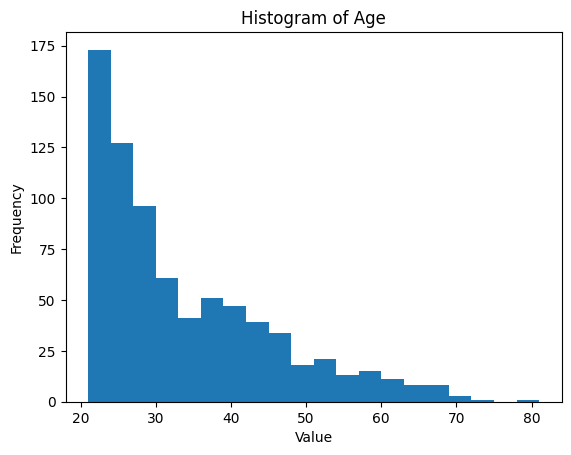

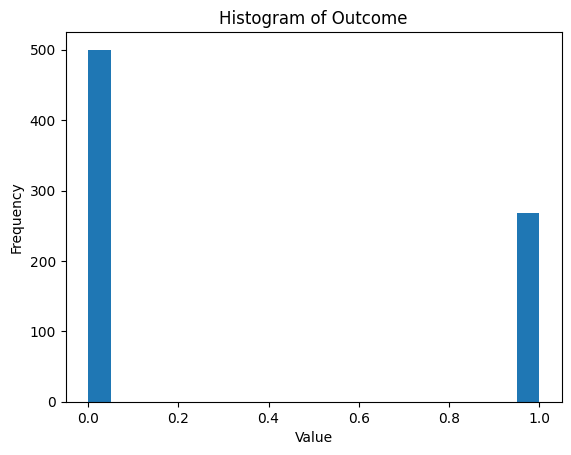

In [5]:
import matplotlib.pyplot as plt
numerical_cols = data.select_dtypes(include='number')

for col in numerical_cols:
    plt.hist(numerical_cols[col], bins=20)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.savefig(f'Histogram_{col}.jpg')
    plt.show()
    
    # From the below Histogram it can be seen that Insulin and Skinthickness has huge amount of zero values.


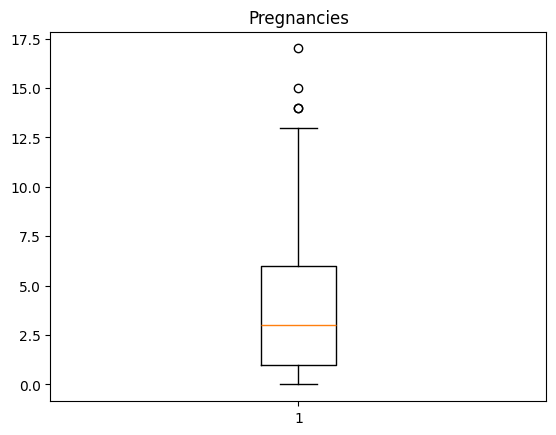

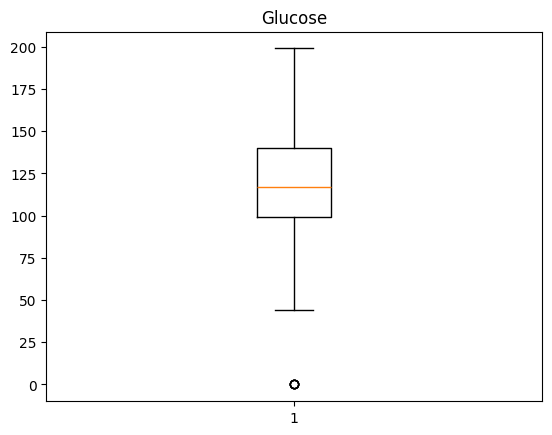

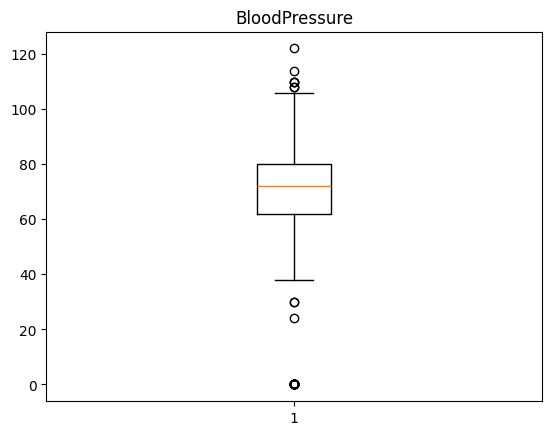

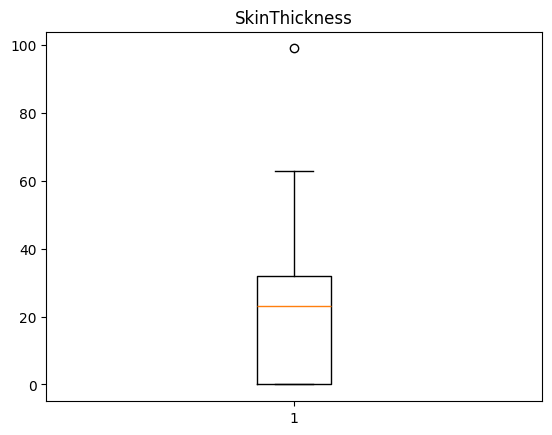

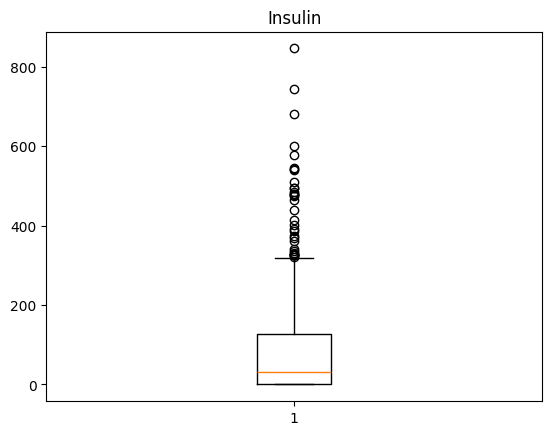

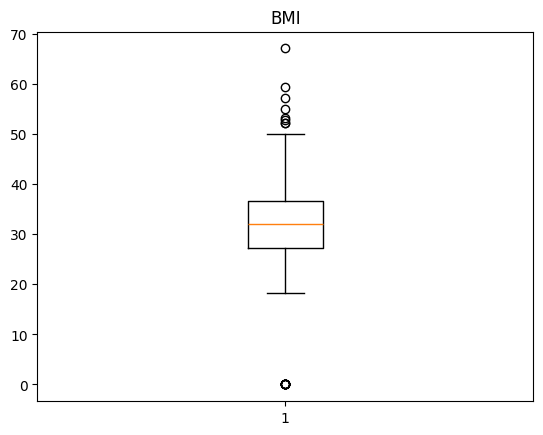

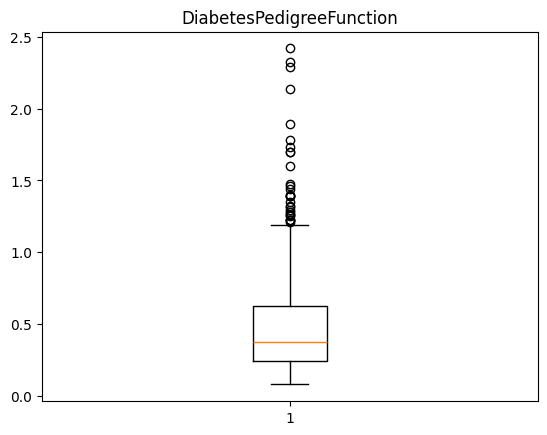

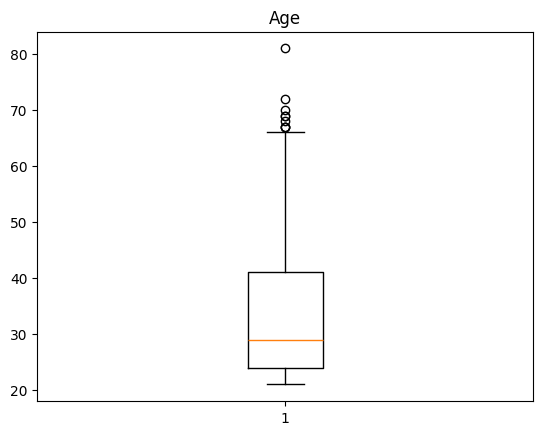

In [6]:
#detecting outliers in the dataset

columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for index, name in enumerate(columns):
    plt.boxplot(data[name])
    plt.title(name)
    plt.savefig(f'{name} with outlier.jpg')
    plt.show()

In [7]:
def outlier_threshold(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lowerbound = q1 - 1.5*iqr
    upperbound = q3 + 1.5*iqr
    return lowerbound, upperbound

In [8]:
def outlier_detection(data, column):
    lowerbound, upperbound = outlier_threshold(data, column)
    if data[(data[column] > upperbound) | (data[column] < lowerbound)].any(axis=None):
        return True
    else:
        return False

In [9]:
def replace_thresholds(data, column):
    lowerbound, upperbound = outlier_threshold(data, column)
    data.loc[(data[column] < lowerbound), column] = lowerbound
    data.loc[(data[column] > upperbound), column] = upperbound

In [10]:
# Find the columns with outliers

for column in columns:
    print(f"{column} -> {outlier_detection(data,column)}")

Pregnancies -> True
Glucose -> True
BloodPressure -> True
SkinThickness -> True
Insulin -> True
BMI -> True
DiabetesPedigreeFunction -> True
Age -> True


In [11]:
#calculation of threshold
threshold = {}
for column in columns:
    lowerbound, upperbound = outlier_threshold(data, column)
    threshold[column] = [lowerbound,upperbound]

print(threshold)

{'Pregnancies': [-6.5, 13.5], 'Glucose': [37.125, 202.125], 'BloodPressure': [35.0, 107.0], 'SkinThickness': [-48.0, 80.0], 'Insulin': [-190.875, 318.125], 'BMI': [13.35, 50.550000000000004], 'DiabetesPedigreeFunction': [-0.32999999999999996, 1.2], 'Age': [-1.5, 66.5]}


In [12]:
#Removal of outliers

for column in columns:
    replace_thresholds(data, column)
    

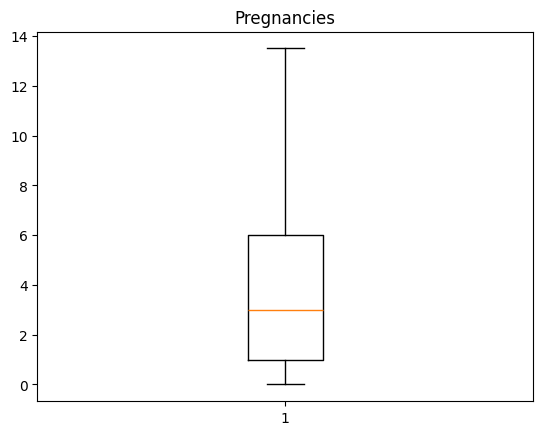

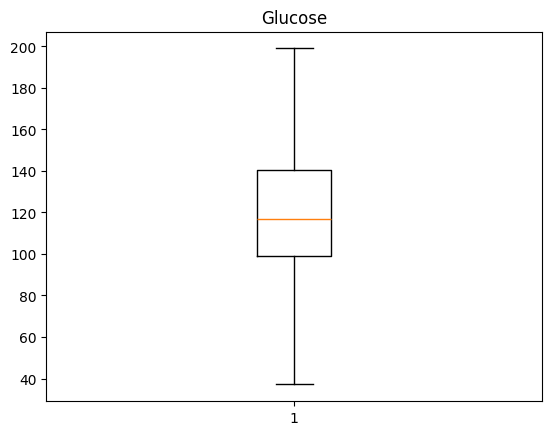

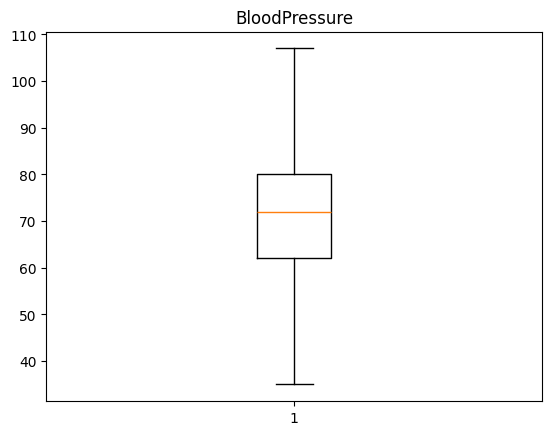

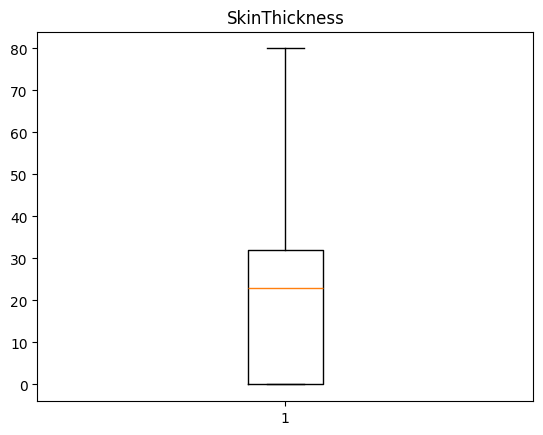

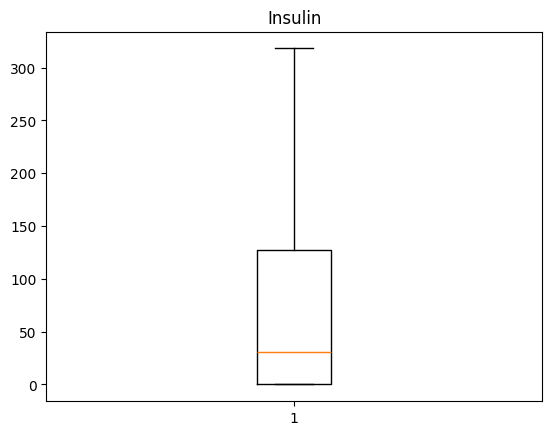

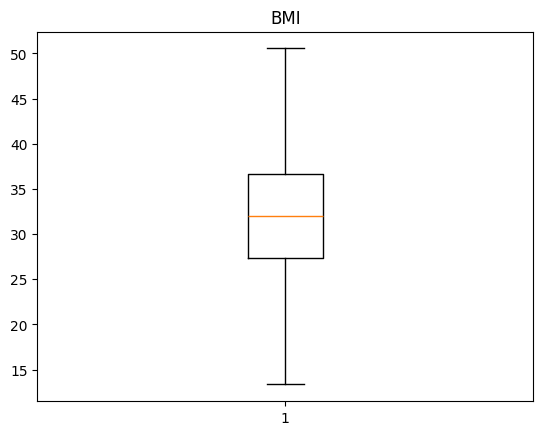

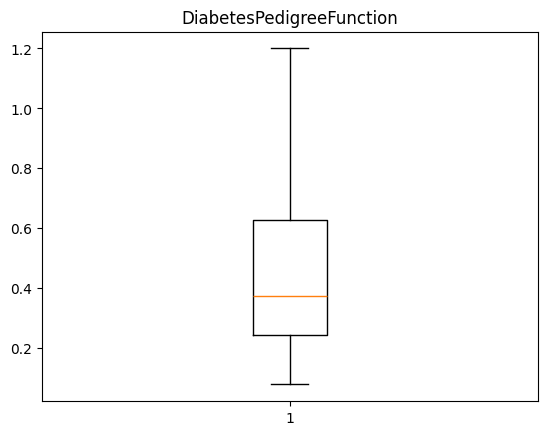

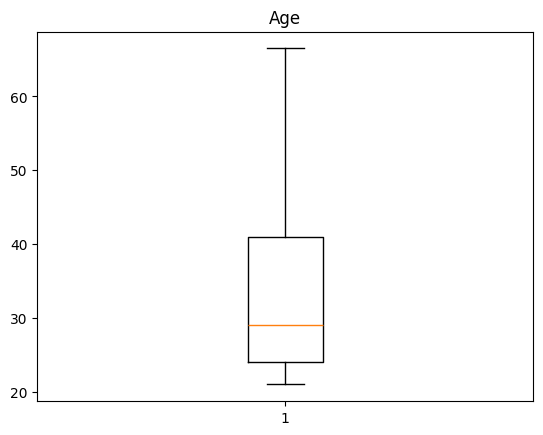

In [13]:
#After removing the outliers

for index, name in enumerate(columns):
    plt.boxplot(data[name])
    plt.title(name)
    plt.savefig(f'{name} without outlier.jpg')
    plt.show()

In [14]:
#  From Histogram it can be seen that Insulin and Skinthickness had a lot of zero values.
zero_count_Insulin = (data['Insulin'] == 0).sum()
zero_count_Skin_thickness = (data['SkinThickness'] == 0).sum()
print(f'Zero values in Insulin = {zero_count_Insulin}\nZero values in Skin Thickness = {zero_count_Skin_thickness}')

Zero values in Insulin = 374
Zero values in Skin Thickness = 227


In [15]:
#Fixing the zero values of Insulin and Skin Thickness with the mean values
insulin_data_with_NaN = data['Insulin'].where(data['Insulin']>0)  #This uses the boolean mask to keep the original values where they are greater than 0 and replace others with NaN
data['Insulin'] = insulin_data_with_NaN.fillna(data.groupby('Outcome')['Insulin'].transform('mean')) #This fills the NaN values with the mean of the non-zero values within each 'Outcome' group. The groupby function is used to calculate means separately for each 'Outcome' group.

skint_data_with_NaN = data['SkinThickness'].where(data['SkinThickness']>0)
data['SkinThickness'] = skint_data_with_NaN.fillna(data.groupby('Outcome')['SkinThickness'].transform('mean'))

In [16]:
# Counting the zero values after replacing with their mean
zero_count_Insulin = (data['Insulin'] == 0).sum()
zero_count_Skin_thickness = (data['SkinThickness'] == 0).sum()
print(f'Zero values in Insulin = {zero_count_Insulin}\nZero values in Skin Thickness = {zero_count_Skin_thickness}')

Zero values in Insulin = 0
Zero values in Skin Thickness = 0


In [17]:
# calculating the minimum value of Insulin and Skin Thickness
print(data['Insulin'].min())
print(data['SkinThickness'].min())

14.0
7.0


In [18]:
# X contains Features and Y contain class
x = data.drop(['Outcome'], axis = 'columns')
y = data['Outcome']

In [19]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35.000000,89.583489,33.6,0.627,50.0
1,1.0,85.0,66,29.000000,65.113750,26.6,0.351,31.0
2,8.0,183.0,64,22.093284,89.583489,23.3,0.672,32.0
3,1.0,89.0,66,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40,35.000000,168.000000,43.1,1.200,33.0


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
x_train_df = pd.DataFrame(x_train,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
x_train_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.148148,0.289575,0.000000,0.212073,0.168068,0.000000,0.201426,0.000000
1,0.666667,0.462548,0.652778,0.290909,0.248528,0.399194,1.000000,0.637363
2,0.074074,0.629344,0.152778,0.200000,0.226880,0.412634,0.513369,0.021978
3,0.000000,0.765251,0.208333,0.212073,0.168068,0.229839,0.156863,0.967033
4,0.444444,0.598456,0.625000,0.527273,1.000000,0.883065,0.142602,0.549451
5,0.074074,0.573745,0.486111,0.090909,0.299219,0.337366,0.351159,0.021978
6,0.296296,0.586100,0.000000,0.256242,0.248528,0.525538,0.199643,0.043956
7,0.740741,0.765251,0.458333,0.272727,0.387998,0.326613,0.221034,0.571429
8,0.074074,0.437838,0.347222,0.690909,0.539252,0.595430,0.300357,0.065934
9,0.074074,0.264865,0.277778,0.212073,0.168068,0.154570,0.160428,0.000000


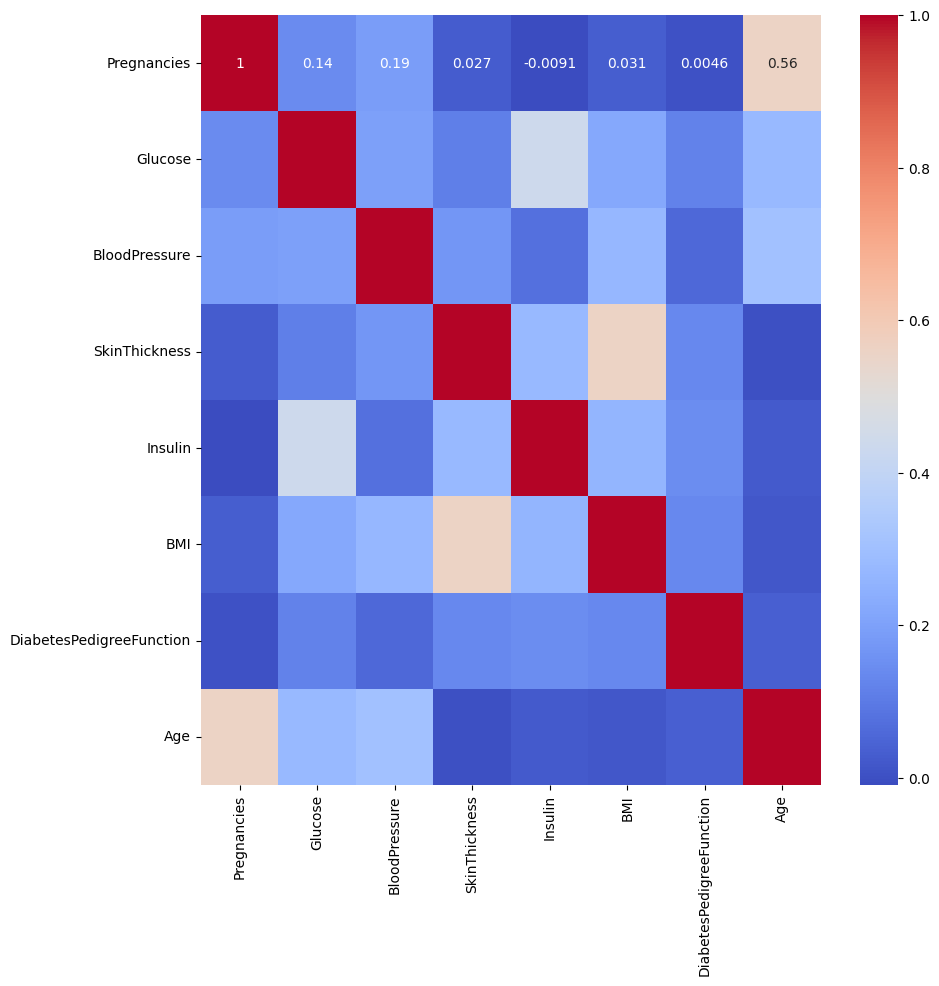

In [24]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(x_train_df.corr(), annot=True, cmap='coolwarm')
plt.savefig('Correlation_plot.jpg')

In [25]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter= 10000,activation='relu',alpha=0.001,hidden_layer_sizes=(50,50,60),solver='adam',random_state=42)

In [26]:
start_time = time.time()
mlp.fit(x_train,y_train)
end_time = time.time()
test_predictions = mlp.predict(x_test)
time_mlp_train = end_time - start_time
print(f"It Took {time_mlp_train:.2f} seconds")

It Took 4.20 seconds


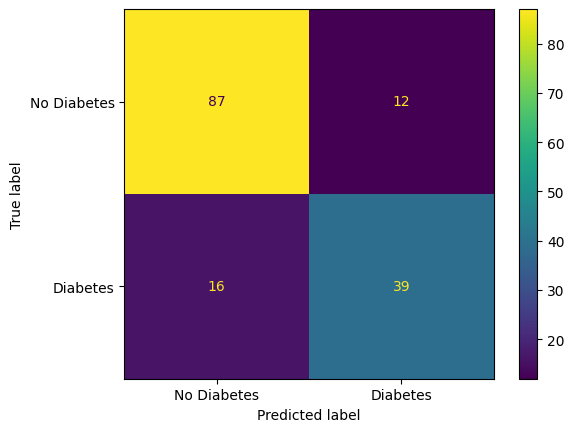

In [27]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,matthews_corrcoef,f1_score, recall_score,precision_score,accuracy_score
cm_mlp = confusion_matrix(y_test,test_predictions)
cm_plot=ConfusionMatrixDisplay(cm_mlp, display_labels=['No Diabetes','Diabetes'])
cm_plot.plot()
plt.savefig('cm.jpg')

In [28]:
mcc_mlp = matthews_corrcoef(y_test,test_predictions)
accuracy_mlp = accuracy_score(y_test,test_predictions)
f1_mlp = f1_score(y_test, test_predictions, average='macro')
recall_mlp = recall_score(y_test, test_predictions, average='macro')
precision_mlp = precision_score(y_test, test_predictions, average='macro')
print(f"Accuracy: {accuracy_mlp:.2f}, F1 Score: {f1_mlp:.2f}, Recall: {recall_mlp:.2f}, MCC: {mcc_mlp:.2f},Precision:{precision_mlp:.2f}")
print(classification_report(y_test,test_predictions))

Accuracy: 0.82, F1 Score: 0.80, Recall: 0.79, MCC: 0.60,Precision:0.80
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        99
           1       0.76      0.71      0.74        55

    accuracy                           0.82       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



In [29]:
# performing K fold cross validation
from sklearn.model_selection import KFold

x_array = x.to_numpy()
y_array = y.to_numpy()

kf = KFold(n_splits=10,shuffle=True) # choose the number of folds and random state

accuracy_scores = []
train_accuracy_scores = []
f1_scores = []
recall_scores = []
mcc_scores = []
precision_scores = []

start_time = time.time()
for train_index, test_index in kf.split(x_array,y_array):
    X_train, X_test = x_array[train_index], x_array[test_index]
    Y_train, Y_test = y_array[train_index], y_array[test_index]

    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    mlp.fit(X_train, Y_train)
    y_pred = mlp.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    train_accuracy=accuracy_score(Y_train,mlp.predict(X_train))
    f1 = f1_score(Y_test, y_pred, average='macro')
    recall = recall_score(Y_test, y_pred, average='macro')
    precision = precision_score(Y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(Y_test, y_pred)

    accuracy_scores.append(accuracy)
    train_accuracy_scores.append(train_accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    mcc_scores.append(mcc)
    precision_scores.append(precision)

    print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Recall: {recall:.2f}, MCC: {mcc:.2f}, Precision: {precision:.2f}")

end_time = time.time()

# Step 5: Evaluate the Model
mean_accuracy_mlp = sum(accuracy_scores) / len(accuracy_scores)
mean_f1_mlp = sum(f1_scores) / len(f1_scores)
mean_recall_mlp = sum(recall_scores) / len(recall_scores)
mean_mcc_mlp = sum(mcc_scores) / len(mcc_scores)
mean_precision_mlp = sum(precision_scores) / len(precision_scores)

print(f"Mean Accuracy: {mean_accuracy_mlp:.2f}, Mean F1 Score: {mean_f1_mlp:.2f}, Mean Recall: {mean_recall_mlp:.2f}, Mean MCC: {mean_mcc_mlp:.2f},Mean Precision: {mean_precision_mlp:.2f}")
time_mlp_cv = end_time - start_time
print(f"It Took {time_mlp_cv:.2f} seconds")

Accuracy: 0.79, F1 Score: 0.75, Recall: 0.74, MCC: 0.51, Precision: 0.77
Accuracy: 0.88, F1 Score: 0.88, Recall: 0.89, MCC: 0.76, Precision: 0.88
Accuracy: 0.81, F1 Score: 0.78, Recall: 0.77, MCC: 0.56, Precision: 0.79
Accuracy: 0.84, F1 Score: 0.81, Recall: 0.80, MCC: 0.62, Precision: 0.82
Accuracy: 0.78, F1 Score: 0.76, Recall: 0.77, MCC: 0.53, Precision: 0.76
Accuracy: 0.81, F1 Score: 0.79, Recall: 0.82, MCC: 0.60, Precision: 0.78
Accuracy: 0.84, F1 Score: 0.83, Recall: 0.83, MCC: 0.67, Precision: 0.85
Accuracy: 0.88, F1 Score: 0.88, Recall: 0.88, MCC: 0.76, Precision: 0.88
Accuracy: 0.87, F1 Score: 0.85, Recall: 0.88, MCC: 0.72, Precision: 0.84
Accuracy: 0.78, F1 Score: 0.74, Recall: 0.74, MCC: 0.49, Precision: 0.75
Mean Accuracy: 0.83, Mean F1 Score: 0.81, Mean Recall: 0.81, Mean MCC: 0.62,Mean Precision: 0.81
It Took 59.89 seconds


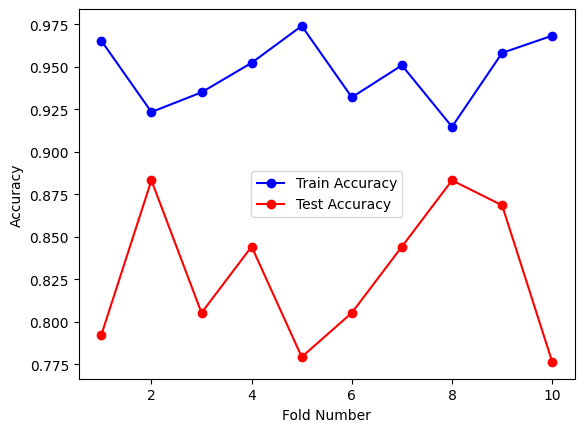

In [30]:
# Plot the accuracy scores
k=10
plt.plot(range(1, k+1), train_accuracy_scores, 'b-o', label='Train Accuracy')
plt.plot(range(1, k+1), accuracy_scores, 'r-o',label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('KFold.jpg')
plt.show()

In [31]:
# Architecture of the model Used
from tabulate import tabulate

print("Number of nodes in input layer: ", mlp.n_features_in_)

# Print the number of nodes in the output layer
print("Number of nodes in output layer: ", mlp.n_outputs_)

# Print the number of hidden layers
print("Number of hidden layers: ", mlp.n_layers_ - 2)

# Print the batch size
print("Batch size: ", mlp.batch_size)

# Print the number of nodes in each hidden layer
print("Number of nodes in each layer: ", mlp.hidden_layer_sizes)

# Print the maximum number of iterations
print("Maximum number of iterations: ", mlp.max_iter)

# Print the activation function
print("Activation function: ", mlp.activation)

# Print the optimizer
print("Optimizer: ", mlp.solver)


# Get the list of coefficients (weights) and intercepts (biases) for each layer
coefficients = mlp.coefs_
intercepts = mlp.intercepts_

# Prepare the data for tabulation
table_data = []
for layer, (coef, intercept) in enumerate(zip(coefficients, intercepts)):
    table_data.append([f"Layer {layer + 1}", f"Weights: {coef.shape}", f"Biases: {intercept.shape}", "\n".join(map(str, coef)), "\n".join(map(str, intercept))])

# Print the table using the tabulate library
table_headers = ["Layer", "Weights Shape", "Biases Shape", "Weights", "Biases"]


table_str = tabulate(table_data, headers=table_headers,tablefmt="grid",colalign=("left", "center", "center", "left", "left"))

with open('Weight_and_Bias.txt', 'w') as f:
    f.write(table_str)


Number of nodes in input layer:  8
Number of nodes in output layer:  1
Number of hidden layers:  3
Batch size:  auto
Number of nodes in each layer:  (50, 50, 60)
Maximum number of iterations:  10000
Activation function:  relu
Optimizer:  adam


In [32]:
#XGBoast for classification
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                             gamma=0.25,
                             learning_rate=0.1,
                             max_depth=4,
                             random_state=42,
                             eval_metric='logloss',
                             reg_lambda=10,
                             n_estimators=100,
                             colsample_bytree=1,
                             subsample=1
                             )

In [33]:
eval_set=[(x_test,y_test)]
esr=10
start_time = time.time()
xgb_model.fit(x_train,y_train,early_stopping_rounds=esr, eval_set=eval_set,verbose=True)
end_time = time.time()
time_xgb_train = end_time - start_time
print(f"It Took {time_xgb_train:.2f} seconds")

[0]	validation_0-logloss:0.60356
[1]	validation_0-logloss:0.56299
[2]	validation_0-logloss:0.52749
[3]	validation_0-logloss:0.49668
[4]	validation_0-logloss:0.47002
[5]	validation_0-logloss:0.44734
[6]	validation_0-logloss:0.42716
[7]	validation_0-logloss:0.40958
[8]	validation_0-logloss:0.39311
[9]	validation_0-logloss:0.37803
[10]	validation_0-logloss:0.36608
[11]	validation_0-logloss:0.35487
[12]	validation_0-logloss:0.34570
[13]	validation_0-logloss:0.33715
[14]	validation_0-logloss:0.32965
[15]	validation_0-logloss:0.32284
[16]	validation_0-logloss:0.31716
[17]	validation_0-logloss:0.31187
[18]	validation_0-logloss:0.30753
[19]	validation_0-logloss:0.30347
[20]	validation_0-logloss:0.29925
[21]	validation_0-logloss:0.29557
[22]	validation_0-logloss:0.29277
[23]	validation_0-logloss:0.28985
[24]	validation_0-logloss:0.28768
[25]	validation_0-logloss:0.28442
[26]	validation_0-logloss:0.28313
[27]	validation_0-logloss:0.28220
[28]	validation_0-logloss:0.27894
[29]	validation_0-loglos

C:\Users\user\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-logloss:0.27184
[34]	validation_0-logloss:0.27175
[35]	validation_0-logloss:0.27086
[36]	validation_0-logloss:0.27053
[37]	validation_0-logloss:0.26923
[38]	validation_0-logloss:0.26848
[39]	validation_0-logloss:0.26877
[40]	validation_0-logloss:0.26834
[41]	validation_0-logloss:0.26741
[42]	validation_0-logloss:0.26724
[43]	validation_0-logloss:0.26636
[44]	validation_0-logloss:0.26521
[45]	validation_0-logloss:0.26500
[46]	validation_0-logloss:0.26476
[47]	validation_0-logloss:0.26437
[48]	validation_0-logloss:0.26502
[49]	validation_0-logloss:0.26501
[50]	validation_0-logloss:0.26485
[51]	validation_0-logloss:0.26460
[52]	validation_0-logloss:0.26514
[53]	validation_0-logloss:0.26488
[54]	validation_0-logloss:0.26488
[55]	validation_0-logloss:0.26456
[56]	validation_0-logloss:0.26469
[57]	validation_0-logloss:0.26426
[58]	validation_0-logloss:0.26419
[59]	validation_0-logloss:0.26434
[60]	validation_0-logloss:0.26381
[61]	validation_0-logloss:0.26396
[62]	validatio

In [34]:
pred = xgb_model.predict(x_test)
accuracy_score(y_test,pred)

0.9025974025974026

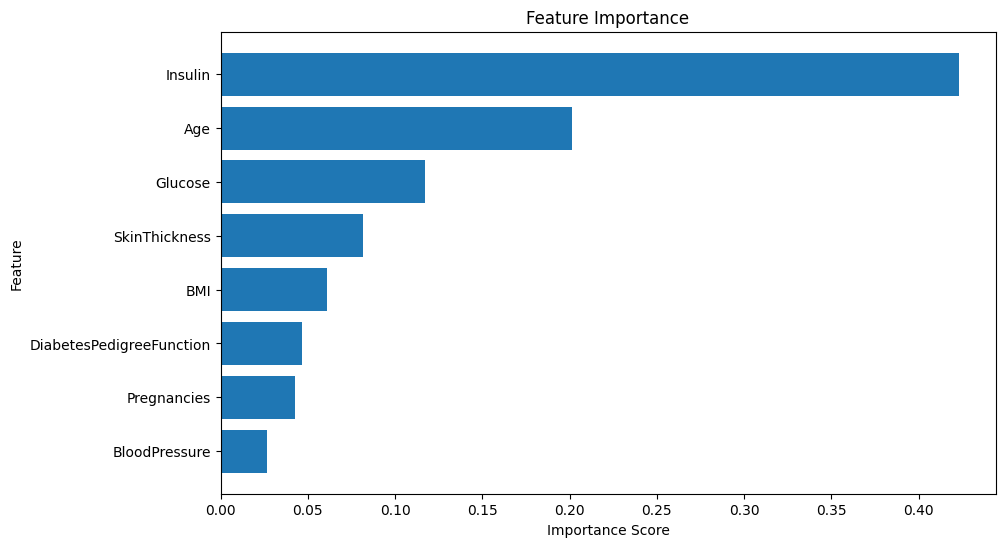

In [35]:
# Printing the feature importance
# feature importance is a metric that helps you understand the relative importance of different features in making predictions.

feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.savefig('Feature_Importance.jpg')
plt.show()

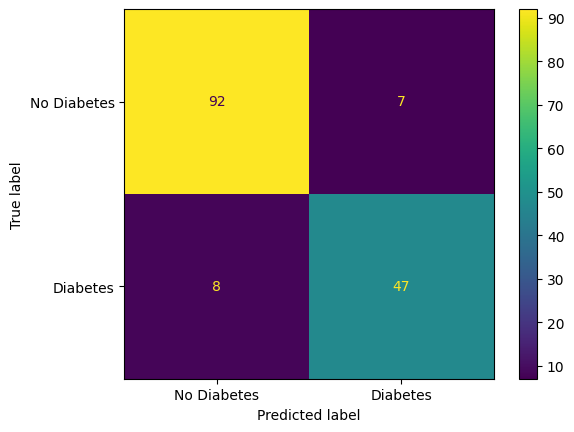

In [36]:
#Confusion Matrix
cm_xgb = confusion_matrix(y_test,pred)
cm_plot=ConfusionMatrixDisplay(cm_xgb, display_labels=['No Diabetes','Diabetes'])
cm_plot.plot()
plt.savefig('XGA_Boostcm.jpg')

In [37]:
#classification Report
mcc_xgb = matthews_corrcoef(y_test,pred)
accuracy_xgb = accuracy_score(y_test,pred)
f1_xgb = f1_score(y_test, pred, average='macro')
recall_xgb = recall_score(y_test, pred, average='macro')
precision_xgb = precision_score(y_test, pred, average='macro')
print(f"Accuracy: {accuracy_xgb:.2f}, F1 Score: {f1_xgb:.2f}, Recall: {recall_xgb:.2f}, MCC: {mcc_xgb:.2f},Precision:{precision_xgb:.2f}")
print(classification_report(y_test,pred))

Accuracy: 0.90, F1 Score: 0.89, Recall: 0.89, MCC: 0.79,Precision:0.90
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        99
           1       0.87      0.85      0.86        55

    accuracy                           0.90       154
   macro avg       0.90      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



In [38]:
# performing K fold cross validation

kf = KFold(n_splits=10,shuffle=True) # choose the number of folds and random state

accuracy_scores = []
train_accuracy_scores = []
f1_scores = []
recall_scores = []
mcc_scores = []
precision_scores = []

start_time = time.time()
for train_index, test_index in kf.split(x_array,y_array):
    X_train, X_test = x_array[train_index], x_array[test_index]
    Y_train, Y_test = y_array[train_index], y_array[test_index]

    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    xgb_model.fit(X_train, Y_train)
    y_pred = xgb_model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    train_accuracy=accuracy_score(Y_train,xgb_model.predict(X_train))
    f1 = f1_score(Y_test, y_pred, average='macro')
    recall = recall_score(Y_test, y_pred, average='macro')
    precision = precision_score(Y_test, y_pred, average='macro')
    mcc = matthews_corrcoef(Y_test, y_pred)

    accuracy_scores.append(accuracy)
    train_accuracy_scores.append(train_accuracy)
    f1_scores.append(f1)
    recall_scores.append(recall)
    mcc_scores.append(mcc)
    precision_scores.append(precision)

    print(f"Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}, Recall: {recall:.2f}, MCC: {mcc:.2f}, Precision: {precision:.2f}")

end_time = time.time()

# Step 5: Evaluate the Model
mean_accuracy_xgb = sum(accuracy_scores) / len(accuracy_scores)
mean_f1_xgb = sum(f1_scores) / len(f1_scores)
mean_recall_xgb = sum(recall_scores) / len(recall_scores)
mean_mcc_xgb = sum(mcc_scores) / len(mcc_scores)
mean_precision_xgb = sum(precision_scores) / len(precision_scores)

print(f"Mean Accuracy: {mean_accuracy_xgb:.2f}, Mean F1 Score: {mean_f1_xgb:.2f}, Mean Recall: {mean_recall_xgb:.2f}, Mean MCC: {mean_mcc_xgb:.2f},Mean Precision: {mean_precision_xgb:.2f}")
time_xgb_cv = end_time - start_time
print(f"It Took {time_xgb_cv:.2f} seconds")

Accuracy: 0.86, F1 Score: 0.84, Recall: 0.83, MCC: 0.67, Precision: 0.84
Accuracy: 0.91, F1 Score: 0.90, Recall: 0.90, MCC: 0.80, Precision: 0.90
Accuracy: 0.83, F1 Score: 0.82, Recall: 0.81, MCC: 0.66, Precision: 0.84
Accuracy: 0.87, F1 Score: 0.83, Recall: 0.83, MCC: 0.65, Precision: 0.83
Accuracy: 0.95, F1 Score: 0.94, Recall: 0.94, MCC: 0.89, Precision: 0.94
Accuracy: 0.90, F1 Score: 0.89, Recall: 0.91, MCC: 0.79, Precision: 0.88
Accuracy: 0.90, F1 Score: 0.89, Recall: 0.88, MCC: 0.78, Precision: 0.89
Accuracy: 0.94, F1 Score: 0.93, Recall: 0.92, MCC: 0.86, Precision: 0.93
Accuracy: 0.88, F1 Score: 0.85, Recall: 0.84, MCC: 0.70, Precision: 0.87
Accuracy: 0.91, F1 Score: 0.90, Recall: 0.90, MCC: 0.81, Precision: 0.91
Mean Accuracy: 0.89, Mean F1 Score: 0.88, Mean Recall: 0.88, Mean MCC: 0.76,Mean Precision: 0.88
It Took 1.48 seconds


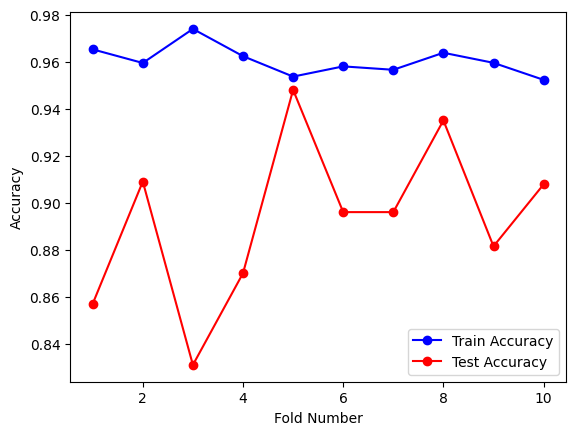

In [39]:
# Plot the accuracy scores
k=10
plt.plot(range(1, k+1), train_accuracy_scores, 'b-o', label='Train Accuracy')
plt.plot(range(1, k+1), accuracy_scores, 'r-o',label='Test Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('XGABoostKFold.jpg')
plt.show()

In [40]:
#plot tree

from xgboost import plot_tree

plot_tree(xgb_model, num_trees=0, ax=plt.gca())
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.savefig('XGAtree.jpg')
plt.show()

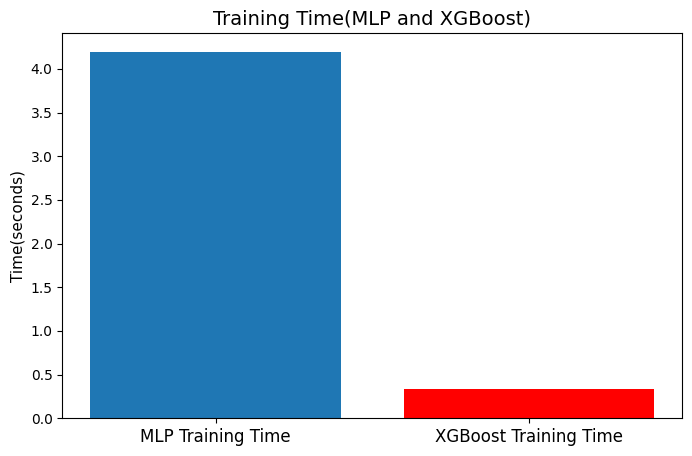

In [41]:
#Finally Plotting the time differences
fig, ax = plt.subplots(figsize=(8,5))
labels = ['MLP Training Time', 'XGBoost Training Time']

mlp_position =[0]
xgb_position = [1]

plt.bar(mlp_position, [time_mlp_train])
plt.bar(xgb_position, [time_xgb_train],color='Red')

plt.ylabel('Time(seconds)',fontsize=11)
plt.title('Training Time(MLP and XGBoost)',fontsize=14)
plt.xticks([0,1],labels,fontsize=12)
plt.savefig('train_time_diff.jpg')
plt.show()

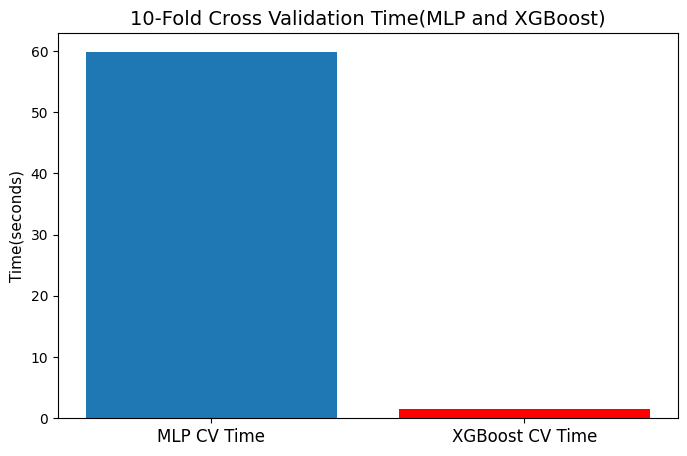

In [42]:
#Finally Plotting the time differences
fig, ax = plt.subplots(figsize=(8,5))
labels = ['MLP CV Time', 'XGBoost CV Time']

mlp_position =[0]
xgb_position = [1]

plt.bar(mlp_position, [time_mlp_cv])
plt.bar(xgb_position, [time_xgb_cv],color='Red')

plt.ylabel('Time(seconds)',fontsize=11)
plt.title('10-Fold Cross Validation Time(MLP and XGBoost)',fontsize=14)
plt.xticks([0,1],labels,fontsize=12)
plt.savefig('cv_time_diff.jpg')
plt.show()

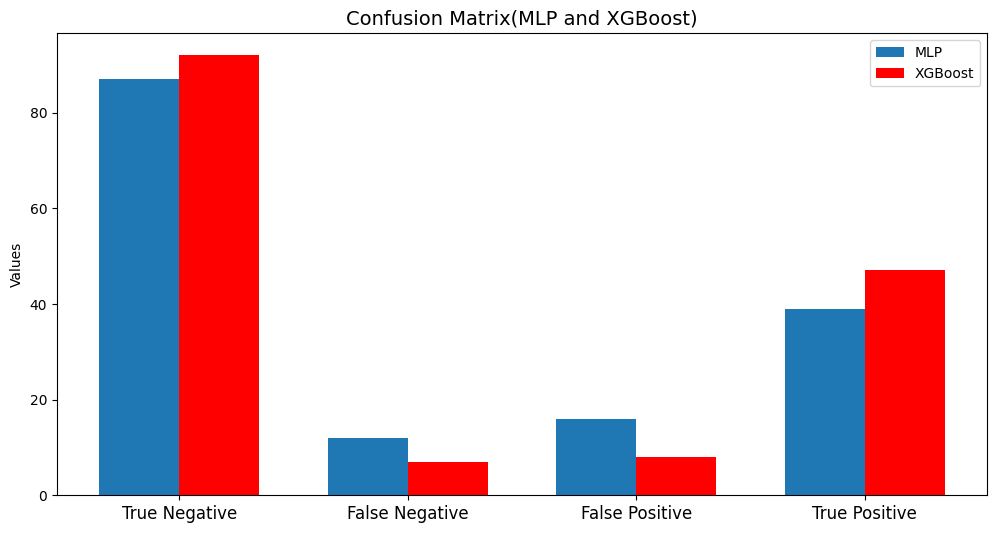

In [43]:
# comparision of TP,TN,FP and FN
cm_mlp_array = cm_mlp.flatten()
cm_xgb_array = cm_xgb.flatten()

labels = ('True Negative','False Negative','False Positive','True Positive')

barwidth = 0.35
fig, ax = plt.subplots(figsize=(12,6))
cm_mlp_position = np.arange(len(labels))
cm_xgb_position = cm_mlp_position + barwidth

plt.bar(cm_mlp_position, cm_mlp_array, width=barwidth,label='MLP')
plt.bar(cm_xgb_position, cm_xgb_array, width=barwidth,label='XGBoost',color='Red')

plt.ylabel('Values')
plt.title("Confusion Matrix(MLP and XGBoost)",fontsize=14)
plt.xticks(cm_mlp_position+(barwidth/2),labels,fontsize=12)
plt.legend()
plt.savefig('Comparisionmodels_cm.jpg')
plt.show()

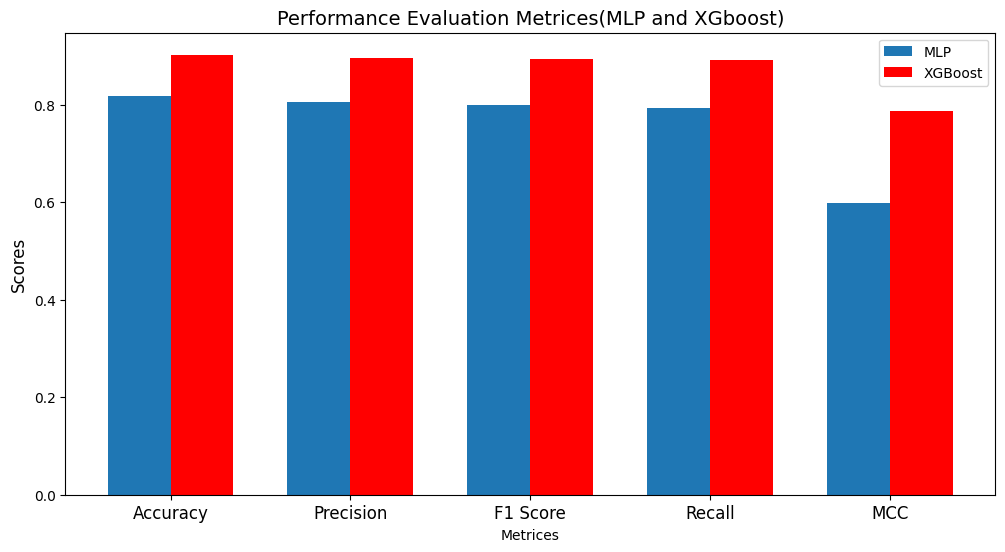

In [44]:
#Comparision of model Graphs

mlp_scores = [accuracy_mlp,precision_mlp,f1_mlp,recall_mlp,mcc_mlp]
xgb_scores = [accuracy_xgb,precision_xgb,f1_xgb,recall_xgb,mcc_xgb]

labels = ["Accuracy", "Precision","F1 Score","Recall","MCC"]

barwidth = 0.35
fig, ax = plt.subplots(figsize=(12,6))
mlp_position = np.arange(len(mlp_scores))
xgb_position = mlp_position + barwidth

plt.bar(mlp_position,mlp_scores,width=barwidth,label='MLP')
plt.bar(xgb_position,xgb_scores,width=barwidth,color='red',label='XGBoost')

plt.title('Performance Evaluation Metrices(MLP and XGboost)',fontsize=14)
plt.xlabel("Metrices")
plt.ylabel('Scores',fontsize=12)
plt.xticks(mlp_position+(barwidth/2),labels,fontsize=12)
plt.legend()
plt.savefig('Comparisionmodels.jpg')
plt.show()

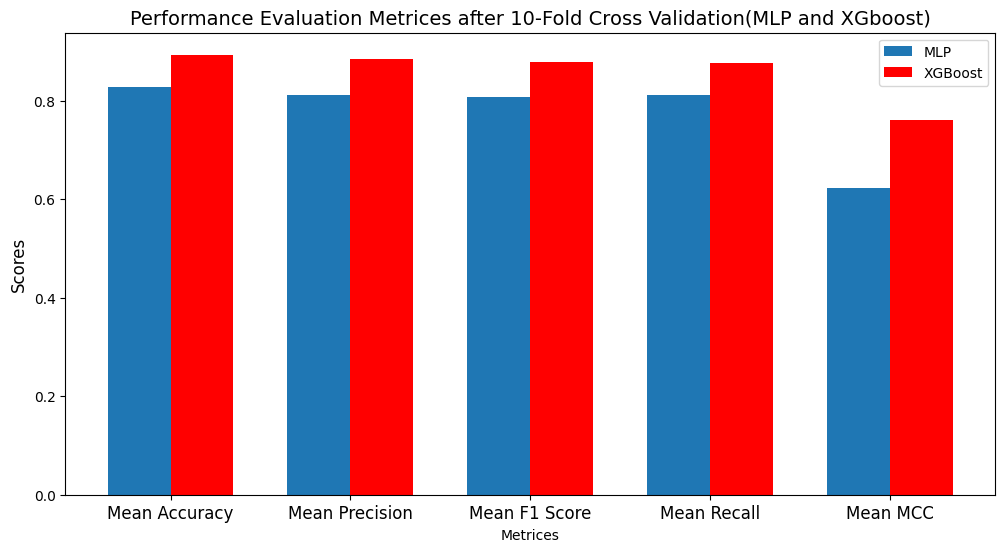

In [45]:
#Comparision of model Graphs

mean_mlp_scores = [mean_accuracy_mlp,mean_precision_mlp,mean_f1_mlp,mean_recall_mlp,mean_mcc_mlp]
mean_xgb_scores = [mean_accuracy_xgb,mean_precision_xgb,mean_f1_xgb,mean_recall_xgb,mean_mcc_xgb]

labels = ["Mean Accuracy", "Mean Precision","Mean F1 Score","Mean Recall","Mean MCC"]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(12,6))
mlp_position = np.arange(len(mlp_scores))
xgb_position = mlp_position + bar_width

plt.bar(mlp_position,mean_mlp_scores,width=bar_width,label='MLP')
plt.bar(xgb_position,mean_xgb_scores,width=bar_width,color='red',label='XGBoost')

plt.title('Performance Evaluation Metrices after 10-Fold Cross Validation(MLP and XGboost)',fontsize=14)
plt.xlabel("Metrices")
plt.ylabel('Scores',fontsize=12)
plt.xticks(mlp_position+(bar_width/2),labels,fontsize=12)
plt.legend()
plt.savefig('Comparisionmodels_CV.jpg')
plt.show()

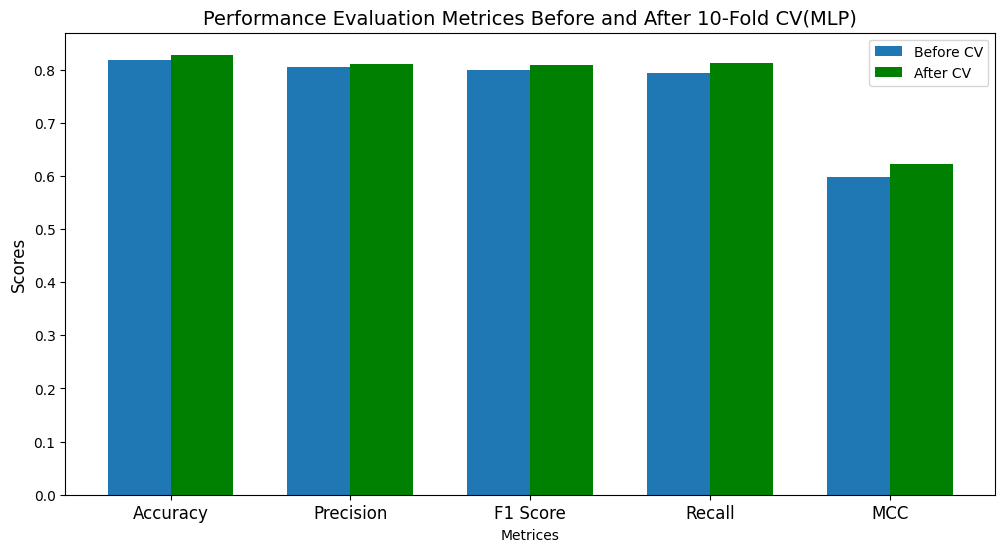

In [46]:
mlp_scores = [accuracy_mlp,precision_mlp,f1_mlp,recall_mlp,mcc_mlp]
mean_mlp_scores = [mean_accuracy_mlp,mean_precision_mlp,mean_f1_mlp,mean_recall_mlp,mean_mcc_mlp]
labels = ["Accuracy", "Precision","F1 Score","Recall","MCC"]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(12,6))
mlp_position = np.arange(len(labels))
mlp_cv_position = mlp_position + bar_width

plt.bar(mlp_position,mlp_scores,width=bar_width,label='Before CV')
plt.bar(mlp_cv_position,mean_mlp_scores,width=bar_width,color='green',label='After CV')

plt.title('Performance Evaluation Metrices Before and After 10-Fold CV(MLP)',fontsize=14)
plt.xlabel("Metrices")
plt.ylabel('Scores',fontsize=12)
plt.xticks(mlp_position+(bar_width/2),labels,fontsize=12)
plt.legend()
plt.savefig('mlp_before_and_after_CV.jpg')
plt.show()

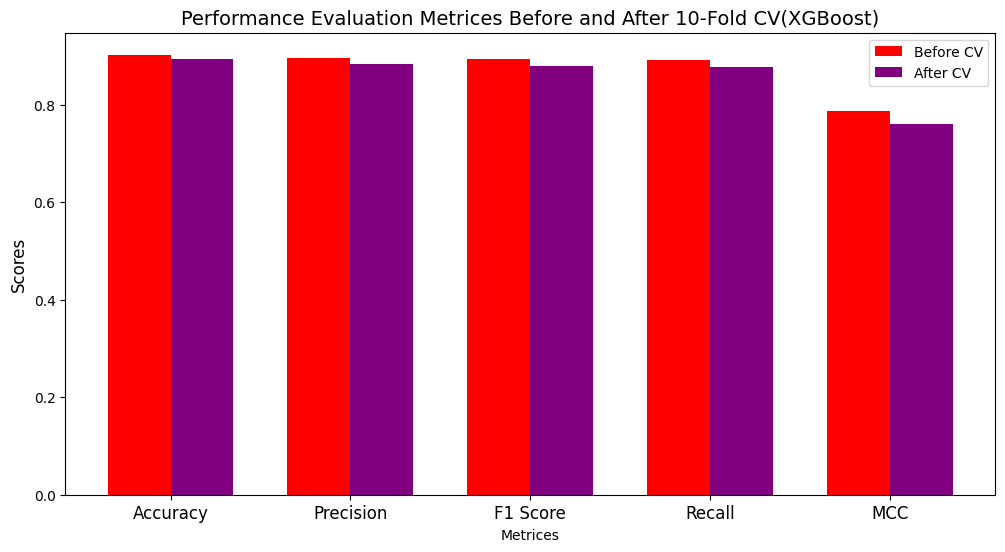

In [47]:
xgb_scores = [accuracy_xgb,precision_xgb,f1_xgb,recall_xgb,mcc_xgb]
mean_xgb_scores = [mean_accuracy_xgb,mean_precision_xgb,mean_f1_xgb,mean_recall_xgb,mean_mcc_xgb]
labels = ["Accuracy", "Precision","F1 Score","Recall","MCC"]

bar_width = 0.35
fig, ax = plt.subplots(figsize=(12,6))
xgb_position = np.arange(len(labels))
xgb_cv_position = mlp_position + bar_width

plt.bar(xgb_position,xgb_scores,width=bar_width,color='red',label='Before CV')
plt.bar(xgb_cv_position,mean_xgb_scores,width=bar_width,color='purple',label='After CV')

plt.title('Performance Evaluation Metrices Before and After 10-Fold CV(XGBoost)',fontsize=14)
plt.xlabel("Metrices")
plt.ylabel('Scores',fontsize=12)
plt.xticks(mlp_position+(bar_width/2),labels,fontsize=12)
plt.legend()
plt.savefig('xbg_before_and_after_CV.jpg')
plt.show()

In [48]:
import pickle
with open('threshold.pkl', 'wb') as f:
    pickle.dump(threshold, f)

In [49]:
# Saving the model using Pickel
with open('diabetesmodel.pkl','wb') as f:
    pickle.dump(mlp,f)

In [50]:
# Saving the scalar using Pickel
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [51]:
with open('xgb_model.pkl','wb') as f:
    pickle.dump(xgb_model,f)